In [22]:
dream_results = {
    "llama4_scout": 473/500,
    "gpt_4o_mini": 481/500,
    "gemini_25_flash_lite": 479/500,
    "grok_3_mini": 483/500,
    "gemma3n_e4b": 455/500,
    "gemma3n_e2b": 426/500,
    "gemma3_4b": 413/500,
}

# CORRECTED TruthfulQA results (were showing DREAM scores by mistake!)
truthful_qa_results = {
    "llama4_scout": 425/500,    # 85.0% ✓ (this was correct)
    "gpt_4o_mini": 374/500,     # 74.8% (was showing 96.2% - DREAM score!)
    "gemini_25_flash_lite": 419/500,  # 83.8% (was showing 95.8% - DREAM score!)
    "grok_3_mini": 466/500,     # 93.2% (was showing 96.6% - DREAM score!)
    "gemma3n_e4b": 362/500,     # 72.4% (was showing 91.0% - DREAM score!)
    "gemma3n_e2b": 306/500,     # 61.2% (was showing 85.2% - DREAM score!)
    "gemma3_4b": 303/500,        # 60.6% (was showing 82.6% - DREAM score!)
    "phi4": 395/500
}

msc_results = {
    "llama4_scout": 483/500,
    "gpt_4o_mini": 477/500,
    "gemini_25_flash_lite": 464/500,
    "grok_3_mini": 493/500,
    "gemma3n_e4b": 466/500,
    

}


In [23]:
# Let's verify the corrected data now
print("=== CORRECTED TRUTHFULQA DATA ===")
for key, value in truthful_qa_results.items():
    print(f"{key}: {value:.3f} ({value*100:.1f}%)")

print("\n=== DREAM DATA (unchanged) ===")
for key, value in dream_results.items():
    print(f"{key}: {value:.3f} ({value*100:.1f}%)")


=== CORRECTED TRUTHFULQA DATA ===
llama4_scout: 0.850 (85.0%)
gpt_4o_mini: 0.748 (74.8%)
gemini_25_flash_lite: 0.838 (83.8%)
grok_3_mini: 0.932 (93.2%)
gemma3n_e4b: 0.724 (72.4%)
gemma3n_e2b: 0.612 (61.2%)
gemma3_4b: 0.606 (60.6%)
phi4: 0.790 (79.0%)

=== DREAM DATA (unchanged) ===
llama4_scout: 0.946 (94.6%)
gpt_4o_mini: 0.962 (96.2%)
gemini_25_flash_lite: 0.958 (95.8%)
grok_3_mini: 0.966 (96.6%)
gemma3n_e4b: 0.910 (91.0%)
gemma3n_e2b: 0.852 (85.2%)
gemma3_4b: 0.826 (82.6%)
phi4: 0.790 (79.0%)


CORRECTED DREAM Rankings:
  Grok 3 Mini: 96.6%
  GPT-4o Mini: 96.2%
  Gemini 2.5 Flash Lite: 95.8%
  Llama 4 Scout: 94.6%
  Gemma 3 (E4B): 91.0%
  Gemma 3 (E2B): 85.2%
  Gemma 3 (4B): 82.6%
  Phi-4: 79.0%

CORRECTED TruthfulQA Rankings:
  Grok 3 Mini: 93.2%
  Llama 4 Scout: 85.0%
  Gemini 2.5 Flash Lite: 83.8%
  Phi-4: 79.0%
  GPT-4o Mini: 74.8%
  Gemma 3 (E4B): 72.4%
  Gemma 3 (E2B): 61.2%
  Gemma 3 (4B): 60.6%


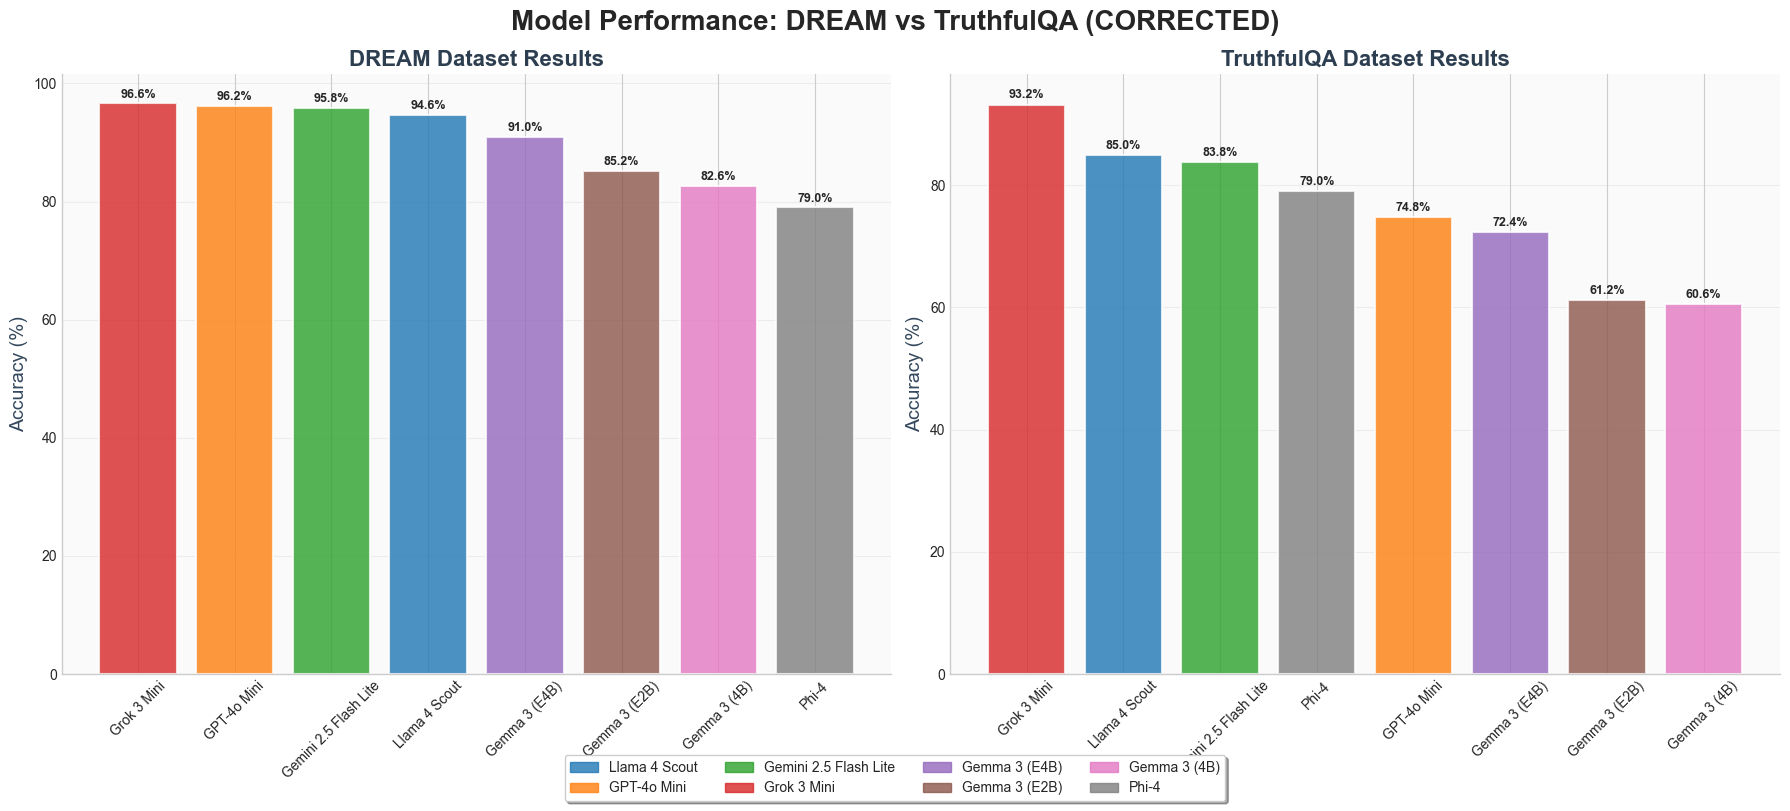

In [25]:
# FRESH CLEAN VISUALIZATION with corrected data and consistent colors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# Model names
names = {
    'llama4_scout': 'Llama 4 Scout',
    'gpt_4o_mini': 'GPT-4o Mini', 
    'gemini_25_flash_lite': 'Gemini 2.5 Flash Lite',
    'grok_3_mini': 'Grok 3 Mini',
    'gemma3n_e4b': 'Gemma 3 (E4B)',
    'gemma3n_e2b': 'Gemma 3 (E2B)', 
    'gemma3_4b': 'Gemma 3 (4B)',
    "phi4": "Phi-4"
}

# Create consistent color mapping for each model
model_colors = {
    'Llama 4 Scout': '#1f77b4',        # Blue
    'GPT-4o Mini': '#ff7f0e',          # Orange  
    'Gemini 2.5 Flash Lite': '#2ca02c', # Green
    'Grok 3 Mini': '#d62728',          # Red
    'Gemma 3 (E4B)': '#9467bd',        # Purple
    'Gemma 3 (E2B)': '#8c564b',        # Brown
    'Gemma 3 (4B)': '#e377c2',        # Pink
    'Phi-4': '#7f7f7f'                # Gray
}

# Process DREAM data
dream_items = sorted(dream_results.items(), key=lambda x: x[1], reverse=True)
dream_names = [names[model] for model, _ in dream_items]
dream_scores = [score * 100 for _, score in dream_items]
dream_colors = [model_colors[name] for name in dream_names]

# Process TruthfulQA data  
truthful_items = sorted(truthful_qa_results.items(), key=lambda x: x[1], reverse=True)
truthful_names = [names[model] for model, _ in truthful_items]
truthful_scores = [score * 100 for _, score in truthful_items]
truthful_colors = [model_colors[name] for name in truthful_names]

print("CORRECTED DREAM Rankings:")
for name, score in zip(dream_names, dream_scores):
    print(f"  {name}: {score:.1f}%")

print("\nCORRECTED TruthfulQA Rankings:")
for name, score in zip(truthful_names, truthful_scores):
    print(f"  {name}: {score:.1f}%")

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# DREAM chart
bars1 = ax1.bar(dream_names, dream_scores, 
                color=dream_colors, alpha=0.8, 
                edgecolor='white', linewidth=1.5)

ax1.set_title('DREAM Dataset Results', fontsize=16, fontweight='bold', color='#2c3e50')
ax1.set_ylabel('Accuracy (%)', fontsize=14, color='#34495e')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.set_ylim(0, max(dream_scores) + 5)

for bar, score in zip(bars1, dream_scores):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{score:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# TruthfulQA chart  
bars2 = ax2.bar(truthful_names, truthful_scores,
                color=truthful_colors, alpha=0.8,
                edgecolor='white', linewidth=1.5)

ax2.set_title('TruthfulQA Dataset Results', fontsize=16, fontweight='bold', color='#2c3e50')
ax2.set_ylabel('Accuracy (%)', fontsize=14, color='#34495e')
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.set_ylim(0, max(truthful_scores) + 5)

for bar, score in zip(bars2, truthful_scores):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{score:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Style both charts
for ax in [ax1, ax2]:
    ax.grid(axis='y', alpha=0.3)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor('#fafafa')

# Add a legend to show which color corresponds to which model
legend_handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.8) 
                 for color in model_colors.values()]
legend_labels = list(model_colors.keys())
fig.legend(legend_handles, legend_labels, loc='center', 
          bbox_to_anchor=(0.5, 0.02), ncol=4, frameon=True, 
          fancybox=True, shadow=True)

fig.suptitle('Model Performance: DREAM vs TruthfulQA (CORRECTED)', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15)  # Extra space for legend
plt.show()
